# Import thư viện cần thiết

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [68]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100

Đọc dữ liệu

In [69]:
train = pd.read_csv('../data/traintrain_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Khám phá dữ liệu

## Tỷ lệ nam và nữ trong các hộ gia đình

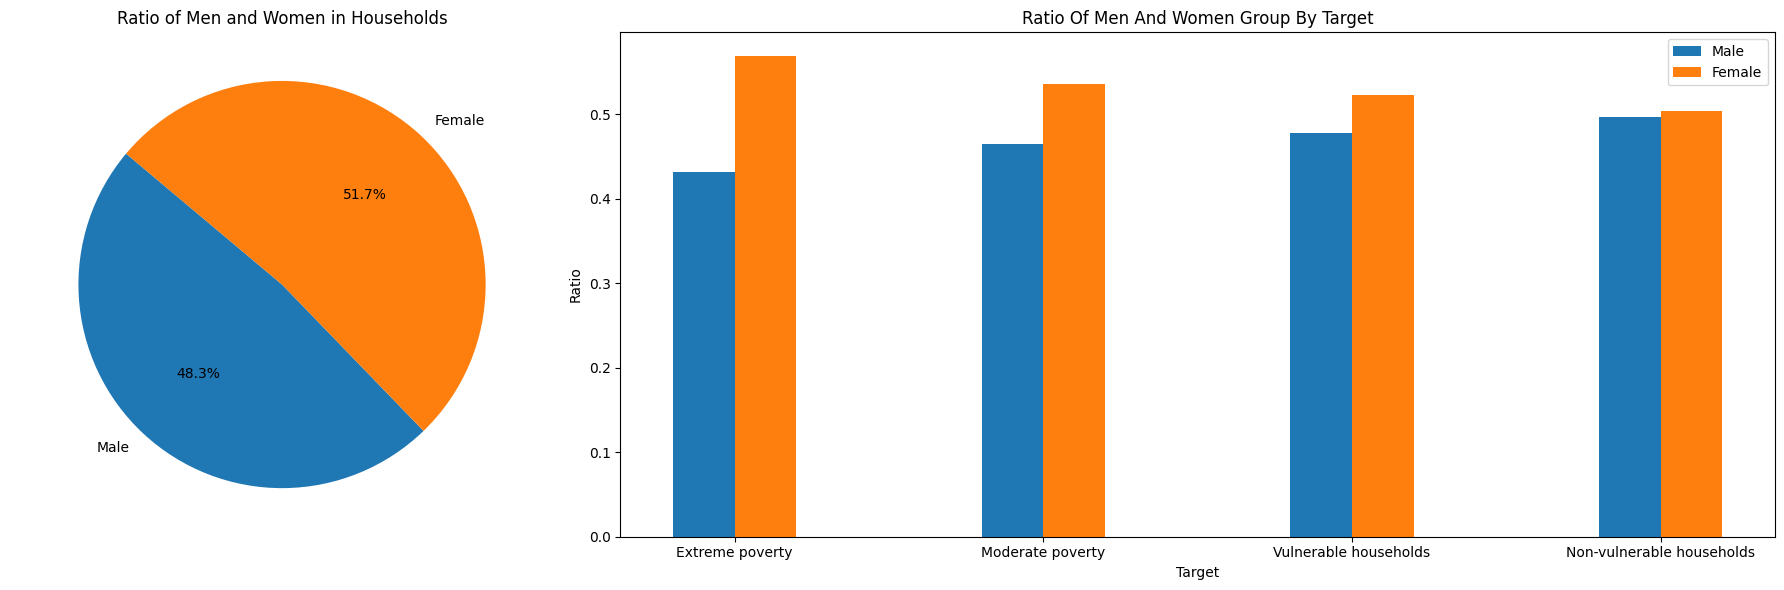

In [130]:
total_males = train['male'].sum()
total_females = train['female'].sum()

male_ratio = total_males / (total_males + total_females)
female_ratio = total_females / (total_males + total_females)

labels = ['Male', 'Female']
colors = ['#1f77b4', '#ff7f0e']
sizes_pie = [male_ratio.mean(), female_ratio.mean()]

# Pie chart
plt.figure(figsize=(18, 6))  
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(sizes_pie, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Men and Women in Households')
plt.axis('equal')

# Bar chart
male_by_target = train.groupby('Target')['male'].sum()
female_by_target = train.groupby('Target')['female'].sum()

male_ratio = male_by_target / (male_by_target + female_by_target)
female_ratio = female_by_target / (male_by_target + female_by_target)

labels_bar = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index_bar = np.arange(len(labels_bar))
bar_width = 0.2

plt.subplot2grid((1, 3), (0, 1), colspan=2)
plt.bar(index_bar, male_ratio, bar_width, label=labels[0], color=colors[0])
plt.bar(index_bar + bar_width, female_ratio, bar_width, label=labels[1], color=colors[1])
plt.xlabel('Target')
plt.ylabel('Ratio')
plt.title('Ratio Of Men And Women Group By Target')
plt.xticks(index_bar + bar_width / 2, labels_bar)

plt.legend()
plt.tight_layout()
plt.show()

#### Nhận xét
- Tỷ lệ nam và nữ trong các hộ gia đình không có sự chênh lệch lớn.
- Kết hợp với cột 'Target' để thấy được tỉ lệ giữa nam và nữ của từng mức độ nghèo. Sự chênh lệch nay không quá lớn.
- Sự chênh lệch lớn nhất giữa nam và nữ trong các hộ gia đình ở cấp độ Extreme poverty, đồng thời sự chênh lệch này có xu hướng giảm dần từ Exemte poverty đến Non-vulnerable households.

### Tỷ lệ phụ thuộc ứng với từng mức độ nghèo

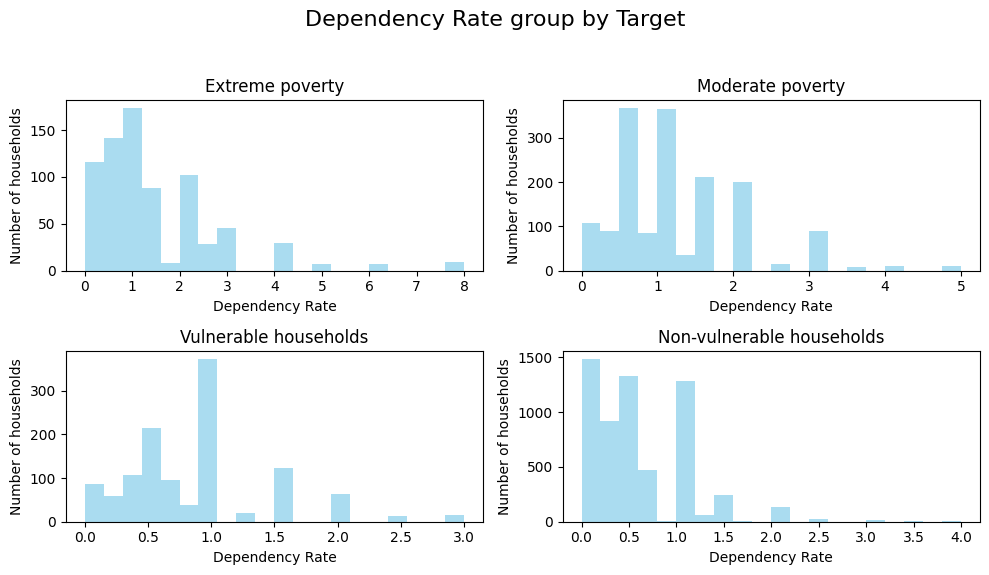

In [127]:
valid_data = train[np.isfinite(train['dependency_rate'])]
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
labels = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']

for i, target in enumerate([1, 2, 3, 4]):
    ax = axs[i // 2, i % 2]
    ax.hist(valid_data[valid_data['Target'] == target]['dependency_rate'], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(labels[i])
    ax.set_xlabel('Dependency Rate')
    ax.set_ylabel('Number of households')

plt.suptitle('Dependency Rate group by Target', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

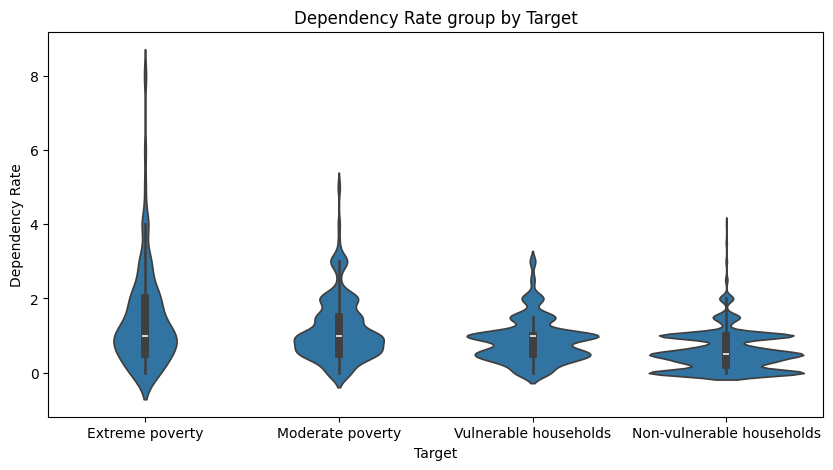

In [134]:
plt.figure(figsize=(10, 5))
labels = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
sns.violinplot(x='Target', y='dependency_rate', data=train)
plt.title('Dependency Rate group by Target')
plt.ylabel('Dependency Rate')
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.show()

#### Nhận xét
- Tỉ lệ phụ thuộc của các hộ gia đình thuộc Exemtre poverty có xu hướng cao hơn so với những hộ gia đình khác cả về giá trị và số lượng
- Tỉ lệ phụ thuộc của các hộ gia đình thuộc Exemtre poverty có giá trị từ 0 đến >8, phân bố nhiều ở khoảng 1-2
- Tỉ lệ phụ thuộc của các hộ gia đình thuộc Moderate poverty có giá trị từ 0 đến 5, phân bố nhiều ở khoảng 0.5-1.5
- Tỉ lệ phụ thuộc của các hộ gia đình thuộc Vulnerable households có giá trị từ 0 đến 3, phân bố nhiều ở khoảng 0.5-1
- Tỉ lệ phụ thuộc ở các gia định thuộc Non-vulnerable households thấp nhất, có giá trị từ 0 đến 4, tập trung nhiều ở khoảng 0-1
- Số lượng tỉ lệ phụ thuộc có giá trị là 0 chiếm số lượng lớn nhất ở các gia đình thuộc Non-vulnerable households với hơn 1400 hộ gia đình.
- Ta có thể thấy, tỉ lệ phụ thuộc có xu hướng giảm dần từ Extreme poverty đến Non-vulnerable households


#### Nhận xét
- Tỉ lệ phụ thuộc ở các gia định thuộc Exemtrme poverty cao hơn so với các gia đình khác, giá trị cao nhất là 8
- Tỉ lệ phụ thuộc ở các gia định thuộc Non-vulnerable households thấp nhất, giá trị cao nhất là 4
- Số lượng tỉ lệ phụ thuộc có giá trị là 0 chiếm số lượng lớn nhất ở các gia đình thuộc Non-vulnerable households với hơn 1400 hộ gia đình.


### Số lượng các loại nhà ở ứng với từng mức độ nghèo

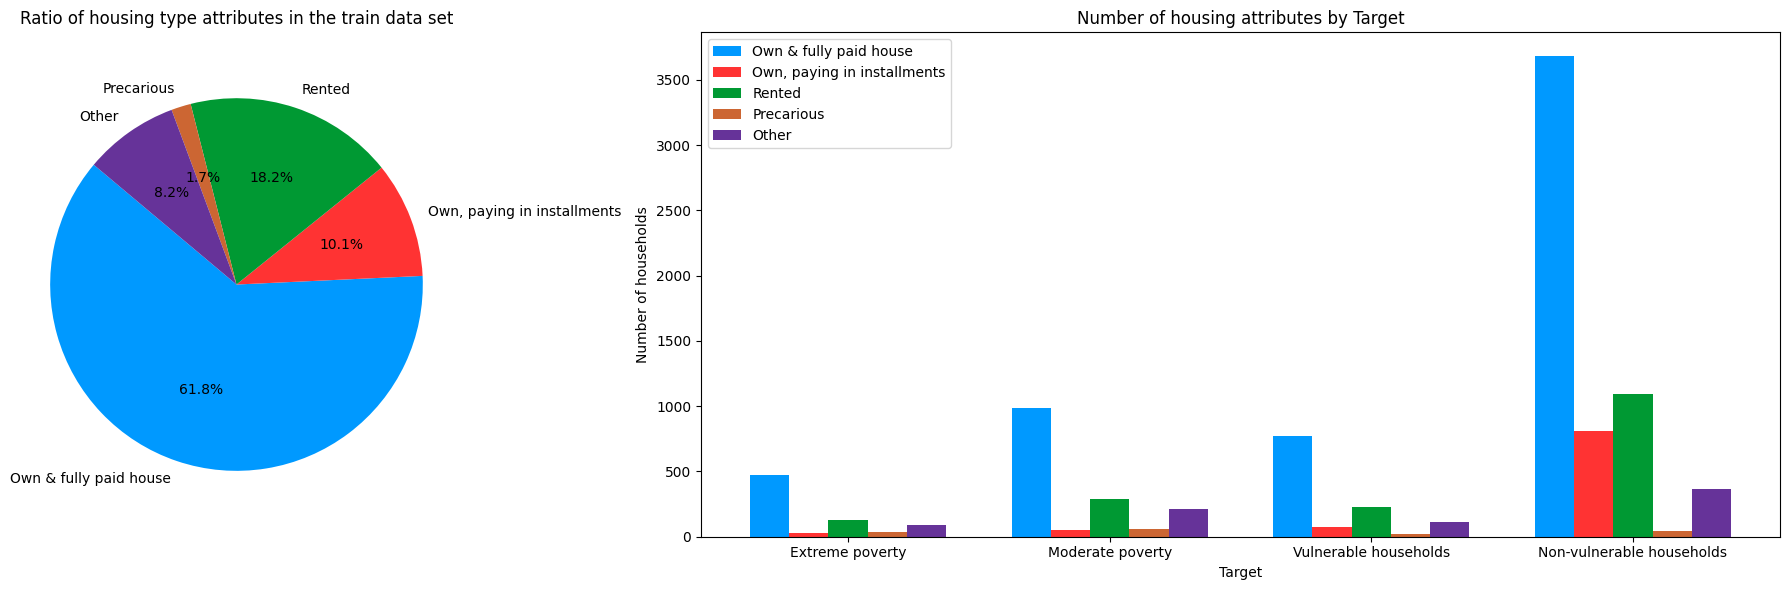

In [88]:
total_houses = sum(train[f'tipovivi{i}'].sum() for i in range(1, 6))

sizes = [train[f'tipovivi{i}'].sum() for i in range(1, 6)]
labels = ['Own & fully paid house', 'Own, paying in installments', 'Rented', 'Precarious', 'Other']
colors = ['#0099FF', '#FF3333', '#009933', '#CC6633', '#663399']
percentages = [100 * size / total_houses for size in sizes]

# Pie chart
plt.figure(figsize=(18, 6))  
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of housing type attributes in the train data set')
plt.axis('equal')

label = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index = np.arange(len(label))
bar_width = 0.15

# Bar chart
plt.subplot2grid((1, 3), (0, 1), colspan=2)
for i in range(1, 6):
    plt.bar(index + (i - 1) * bar_width, train.groupby('Target')[f'tipovivi{i}'].sum(), bar_width, label=labels[i - 1], color=colors[i - 1])

plt.xlabel('Target')
plt.ylabel('Number of households')
plt.title('Number of housing attributes by Target')
plt.xticks(index + 2*bar_width, label)
plt.legend()

plt.tight_layout()
plt.show()


#### Nhận xét:
- Số lượng hộ gia đình sống trong các căn nhà đã được trả hết tiền và sở hữu chiếm tỷ lệ lớn nhất, chiếm khoảng 60%.
- Hầu hết các hộ gia đình sống trong các căn nhà đã trả hết tiền và sở hữu đều thuộc Nhóm không dễ tổn thương.